In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.svm import SVC
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("COVID-19.csv")

In [3]:
data.sort_values(by="Week Start")

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
1593,60636,10,03/01/2020,03/07/2020,NaN,NaN,NaN,NaN,0.0,0,...,0.0,0.0,0.0,0,0,0.0,0.0,32203,60636-10,POINT (-87.668597 41.77599)
1328,60628,10,03/01/2020,03/07/2020,NaN,NaN,NaN,NaN,2.0,2,...,3.0,0.0,0.0,0,0,0.0,0.0,66724,60628-10,POINT (-87.621537 41.694192)
781,60612,10,03/01/2020,03/07/2020,NaN,NaN,NaN,NaN,1.0,1,...,2.9,0.0,0.0,0,0,0.0,0.0,34311,60612-10,POINT (-87.687011 41.88004)
1949,60646,10,03/01/2020,03/07/2020,NaN,NaN,NaN,NaN,3.0,3,...,10.7,0.0,0.0,0,0,0.0,0.0,27987,60646-10,POINT (-87.761826 41.993931)
1984,60647,10,03/01/2020,03/07/2020,NaN,NaN,NaN,NaN,0.0,0,...,0.0,0.0,0.0,0,0,0.0,0.0,87509,60647-10,POINT (-87.701101 41.921058)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,60606,47,11/15/2020,11/21/2020,17.0,166.0,548.0,5353.1,228.0,4035,...,130119.3,0.1,0.1,0,1,0.0,32.2,3101,60606-47,POINT (-87.63676 41.882634)
1773,60616,47,11/15/2020,11/21/2020,167.0,1807.0,307.0,3317.8,2360.0,35412,...,65019.1,0.1,0.1,2,49,3.7,90.0,54464,60616-47,POINT (-87.629531 41.844869)
1772,60605,47,11/15/2020,11/21/2020,136.0,978.0,494.0,3553.9,1513.0,19020,...,69115.9,0.1,0.0,1,6,3.6,21.8,27519,60605-47,POINT (-87.623449 41.867824)
1714,60615,47,11/15/2020,11/21/2020,115.0,1199.0,277.0,2884.8,2871.0,33286,...,80085.7,0.0,0.0,1,17,2.4,40.9,41563,60615-47,POINT (-87.602725 41.801993)


### data preparation

data.dtypes

In [4]:
data.isnull().sum()

ZIP Code                                  0
Week Number                               0
Week Start                                0
Week End                                  0
Cases - Weekly                          175
Cases - Cumulative                      175
Case Rate - Weekly                      175
Case Rate - Cumulative                  175
Tests - Weekly                           30
Tests - Cumulative                        0
Test Rate - Weekly                        0
Test Rate - Cumulative                    0
Percent Tested Positive - Weekly          0
Percent Tested Positive - Cumulative      0
Deaths - Weekly                           0
Deaths - Cumulative                       0
Death Rate - Weekly                       0
Death Rate - Cumulative                   0
Population                                0
Row ID                                    0
ZIP Code Location                        38
dtype: int64

In [5]:
data = data.fillna(0)

==> 21 variables, int64(6), float64(10), object(5), also we changed Nan value to 0, because when "week start" on March 1st, the value is Nan. It does not proper aggregate so we changed to start 0.

In [6]:
data = data.drop(['Cases - Weekly', 'Cases - Cumulative', 'Tests - Weekly', 'Tests - Cumulative', 'Deaths - Weekly', 'Deaths - Cumulative'], axis = 1)  

==> (should find irrelevant for redundant variables), I think should use "Rate case or not", so delete 2 of 4 like (Case-weekly and Cumulative) or (Case Rate - Weekly or Cummulative). But in my opinion to delete totals, not rates as like our project1.

#### Data Exploration

==> I think we can change every weeks by month

In [7]:
data.dtypes

ZIP Code                                 object
Week Number                               int64
Week Start                               object
Week End                                 object
Case Rate - Weekly                      float64
Case Rate - Cumulative                  float64
Test Rate - Weekly                        int64
Test Rate - Cumulative                  float64
Percent Tested Positive - Weekly        float64
Percent Tested Positive - Cumulative    float64
Death Rate - Weekly                     float64
Death Rate - Cumulative                 float64
Population                                int64
Row ID                                   object
ZIP Code Location                        object
dtype: object

In [8]:
data['Month'] = pd.DatetimeIndex(data['Week Start']).month
data.sort_values(by='Month')

,ZIP Code,Week Number,Week Start,Week End,Case Rate - Weekly,Case Rate - Cumulative,Test Rate - Weekly,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location,Month
0,60603,13,03/22/2020,03/28/2020,0.0,0.0,256,340.7,0.0,0.0,0.0,0.0,1174,60603-13,POINT (-87.625473 41.880112),3
1232,60623,10,03/01/2020,03/07/2020,0.0,0.0,4,3.5,0.0,0.0,0.0,0.0,85979,60623-10,POINT (-87.717446 41.850321),3
1236,60623,14,03/29/2020,04/04/2020,121.0,210.5,248,508.3,0.4,0.4,5.8,10.5,85979,60623-14,POINT (-87.717446 41.850321),3
398,60643,14,03/29/2020,04/04/2020,204.0,391.0,487,1036.7,0.4,0.3,6.0,6.0,49870,60643-14,POINT (-87.662381 41.700445),3
397,60643,13,03/22/2020,03/28/2020,142.0,186.5,387,549.4,0.3,0.3,0.0,0.0,49870,60643-13,POINT (-87.662381 41.700445),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,60613,47,11/15/2020,11/21/2020,341.0,3755.5,5895,73675.5,0.1,0.1,0.0,67.8,50113,60613-47,POINT (-87.661343 41.953742),11
299,60604,45,11/01/2020,11/07/2020,1151.0,6138.1,7033,90792.8,0.2,0.1,0.0,0.0,782,60604-45,POINT (-87.629029 41.878153),11
1741,60629,47,11/15/2020,11/21/2020,857.0,9344.7,3704,54128.7,0.3,0.2,3.6,130.5,111850,60629-47,POINT (-87.711565 41.777061),11
1502,60666,46,11/08/2020,11/14/2020,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,60666-46,POINT (-87.896371 41.979511),11


In [9]:
dt = data.groupby("Month")

In [10]:
dt['Case Rate - Weekly'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
3,300.0,40.036667,53.039412,0.0,0.00,15.5,64.00,249.0
4,240.0,161.366667,134.032434,0.0,72.00,133.5,210.50,791.0
5,300.0,123.286667,110.584361,0.0,46.00,88.5,167.25,632.0
6,240.0,44.137500,25.505309,0.0,27.00,42.0,59.25,129.0
7,240.0,64.758333,37.012154,0.0,46.75,62.0,81.00,258.0
8,300.0,74.950000,48.080070,0.0,50.00,67.5,95.25,512.0
9,240.0,68.020833,39.775989,0.0,41.00,66.0,89.00,225.0
10,240.0,210.579167,127.943281,0.0,121.50,191.0,285.25,651.0
11,180.0,485.350000,211.745406,0.0,360.25,468.5,602.50,1151.0


In [11]:
dt['Test Rate - Weekly'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
3,300.0,160.083333,172.068499,0.0,7.00,114.0,262.25,895.0
4,240.0,625.075000,357.540159,0.0,382.75,565.5,820.50,2046.0
5,300.0,1085.080000,518.047086,0.0,801.50,1043.5,1310.25,4708.0
6,240.0,1417.670833,626.231670,0.0,1141.50,1336.5,1656.50,4394.0
7,240.0,1824.520833,707.918671,0.0,1436.25,1799.0,2165.25,4224.0
8,300.0,1918.960000,756.853948,0.0,1589.75,1893.0,2322.75,4476.0
9,240.0,2058.754167,1123.301974,0.0,1485.25,1908.5,2605.25,9717.0
10,240.0,3078.204167,1515.199526,0.0,2218.75,2942.5,3898.25,9245.0
11,180.0,4131.605556,1797.739759,0.0,3152.50,4046.0,5155.75,11093.0


In [12]:
dt['Percent Tested Positive - Weekly'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
3,300.0,0.127333,0.139467,0.0,0.0,0.1,0.2,0.5
4,240.0,0.231250,0.111581,0.0,0.2,0.2,0.3,0.5
5,300.0,0.128000,0.082292,0.0,0.1,0.1,0.2,0.4
6,240.0,0.033750,0.048259,0.0,0.0,0.0,0.1,0.2
7,240.0,0.034167,0.048398,0.0,0.0,0.0,0.1,0.2
8,300.0,0.038667,0.049461,0.0,0.0,0.0,0.1,0.2
9,240.0,0.027917,0.044953,0.0,0.0,0.0,0.1,0.1
10,240.0,0.076250,0.058382,0.0,0.0,0.1,0.1,0.2
11,180.0,0.131111,0.070345,0.0,0.1,0.1,0.2,0.3


In [13]:
dt['Death Rate - Weekly'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
3,300.0,1.057000,2.870794,0.0,0.000,0.00,0.000,21.7
4,240.0,7.789167,8.083133,0.0,0.825,6.30,11.200,54.3
5,300.0,6.966333,7.499666,0.0,0.000,5.50,10.275,50.0
6,240.0,2.509167,3.603264,0.0,0.000,1.65,3.425,32.2
7,240.0,0.773750,1.432271,0.0,0.000,0.00,1.300,6.8
8,300.0,0.682667,1.465147,0.0,0.000,0.00,1.100,8.5
9,240.0,0.590417,1.124002,0.0,0.000,0.00,1.125,6.8
10,240.0,0.983333,1.866522,0.0,0.000,0.00,1.600,14.5
11,180.0,2.437778,2.564828,0.0,0.000,2.10,4.000,14.5


==> suppose 3-5 is spring, 6-8 is summer, 9-11 is fall
    So picked April, July, and October

In [14]:
April = data.loc[data['Month'] == 4]
July = data.loc[data['Month'] == 7]
October = data.loc[data['Month'] == 10]

In [15]:
[statistic, pvalue] = st.ttest_ind(April['Case Rate - Weekly'],July['Case Rate - Weekly'],equal_var = False)
print(pvalue)

8.827586435003835e-23


==> April is higher. p-value is less than 0.05 which means there is sufficient data to reject the null hypothesis that Case Rate by Week of Spring and Summer are equal.

In [16]:
[statistic, pvalue] = st.ttest_ind(July['Case Rate - Weekly'],October['Case Rate - Weekly'],equal_var = False)
print(pvalue)

8.084214996998557e-45


==>  October is high. p-value is less than 0.05 which means there is sufficient data to reject the null hypothesis that Case Rate by Week of Summer and Fall are equal.

In [17]:
[statistic, pvalue] = st.ttest_ind(April['Case Rate - Weekly'],October['Case Rate - Weekly'],equal_var = False)
print(pvalue)

4.5708502755672255e-05


==> October is high. p-value is less than 0.05 which means there is sufficient data to reject the null hypothesis that Case Rate by Week of Spring and Fall are equal.

### Making Plot

In [18]:
data_spring = data.loc[data['Month'] < 6]
data_summer = data.loc[(data['Month'] >= 6) & (data['Month'] < 9)]
data_fall = data.loc[(data['Month'] >= 9)]

In [19]:
a = [{'Population' : sum(data_spring['Population'])}]
data_case = pd.DataFrame(a)
data_case['Case Rate'] = sum(data_spring['Case Rate - Weekly'] / 100*data_spring['Population'])
data_case['Test Rate'] = sum(data_spring['Test Rate - Weekly'] / 100*data_spring['Population'])
data_case['Tested Positive'] = sum(data_spring['Percent Tested Positive - Weekly'] / 100*data_spring['Population'])
data_case['Death Rate'] = sum(data_spring['Death Rate - Weekly'] / 100*data_spring['Population'])
data_case['Seasons'] = 'Spring'

In [20]:
data_case = data_case.append({'Population' : sum(data_summer['Population']),
                              'Case Rate' : sum(data_summer['Case Rate - Weekly'] / 100*data_summer['Population']),
                              'Test Rate' : sum(data_summer['Test Rate - Weekly'] / 100*data_summer['Population']),
                              'Tested Positive' : sum(data_summer['Percent Tested Positive - Weekly'] / 100*data_summer['Population']),
                              'Death Rate' : sum(data_summer['Death Rate - Weekly'] / 100*data_summer['Population']),
                              'Seasons' : 'Summer'}, ignore_index = True)

In [21]:
data_case = data_case.append({'Population' : sum(data_fall['Population']),
                              'Case Rate' : sum(data_fall['Case Rate - Weekly'] / 100*data_fall['Population']),
                              'Test Rate' : sum(data_fall['Test Rate - Weekly'] / 100*data_fall['Population']),
                              'Tested Positive' : sum(data_fall['Percent Tested Positive - Weekly'] / 100*data_fall['Population']),
                              'Death Rate' : sum(data_fall['Death Rate - Weekly'] / 100*data_fall['Population']),
                              'Seasons' : 'Fall'}, ignore_index = True)

In [22]:
data_case['Case Rate'] = data_case['Case Rate'] / data_case['Population']
data_case['Test Rate'] = data_case['Test Rate'] / data_case['Population']
data_case['Tested Positive'] = data_case['Tested Positive'] / data_case['Population']
data_case['Death Rate'] = data_case['Death Rate'] / data_case['Population']

<AxesSubplot:xlabel='Seasons'>

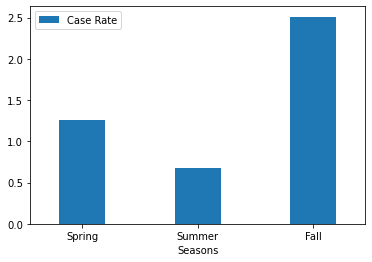

In [26]:
data_case.plot.bar(x='Seasons', y = ['Case Rate'], width = 0.4, rot = 0)

<AxesSubplot:xlabel='Seasons'>

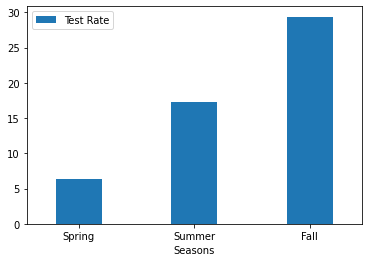

In [27]:
data_case.plot.bar(x='Seasons', y = ['Test Rate'], width = 0.4, rot = 0)

<AxesSubplot:xlabel='Seasons'>

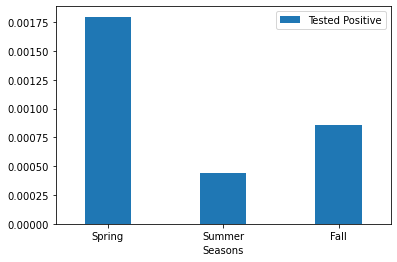

In [28]:
data_case.plot.bar(x='Seasons', y = ['Tested Positive'], width = 0.4, rot = 0)

<AxesSubplot:xlabel='Seasons'>

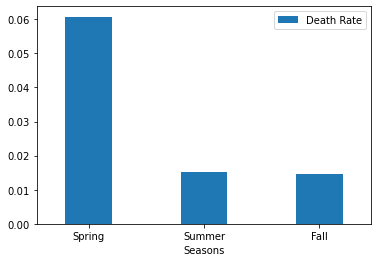

In [29]:
data_case.plot.bar(x='Seasons', y = ['Death Rate'], width = 0.4, rot = 0)